# Predicting the demand for bikes using multiple linear regression

### Objective

Objective of this excercise is to provide BoomBikes(a bike ride sharing company) with actionable insights and a predictive model that can help them strategically plan for demand in a post-pandemic landscape, enabling them to optimize their operations and potentially increase revenue.


### Importing and Understanding Data


In [55]:
# Importing libraries essential for data analysis and machine learning

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Importing the given bike data in csv format
bike = pd.read_csv(r"C:\Users\rajes\OneDrive\Desktop\MastersIIITB\Course 2 ML\day.csv")

# Exploring first few records
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [57]:
# Exploring the record count and number of columns
bike.shape

(730, 16)

In [58]:
# Checking for data type and null records
bike.info()

# No major imputation required based on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
#Gathering basic statistics on the columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [60]:
# As per the businesss directive, causal and registered columns do not make any impact and sum of both are rolled up to cnt columns. 
# These two columns can be dropped from dataset
bike = bike.drop(columns=['casual', 'registered'])


In [61]:
# Converting 'dteday' to datetime format
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')  
#renaming to apporpriate column names
bike.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True) 
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

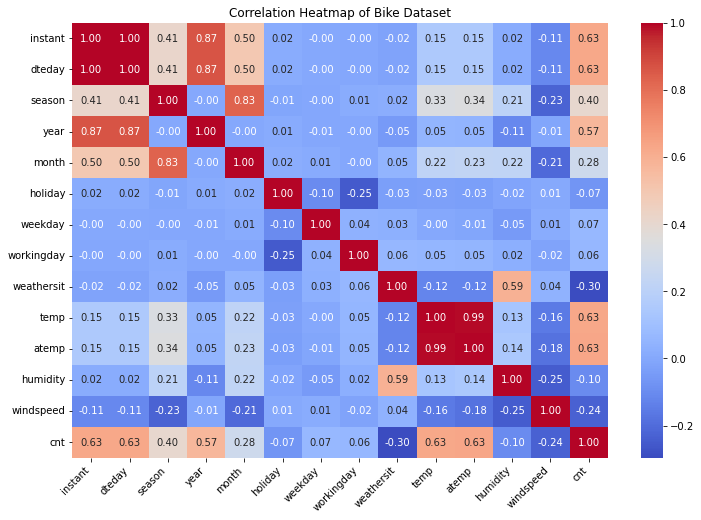

In [62]:
# Calculating the correlation matrix
corr_matrix = bike.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 8))

# Drawing the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adjusting the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Bike Dataset')

# Display the heatmap
plt.show()

# temp and atemp are highly co-related columns

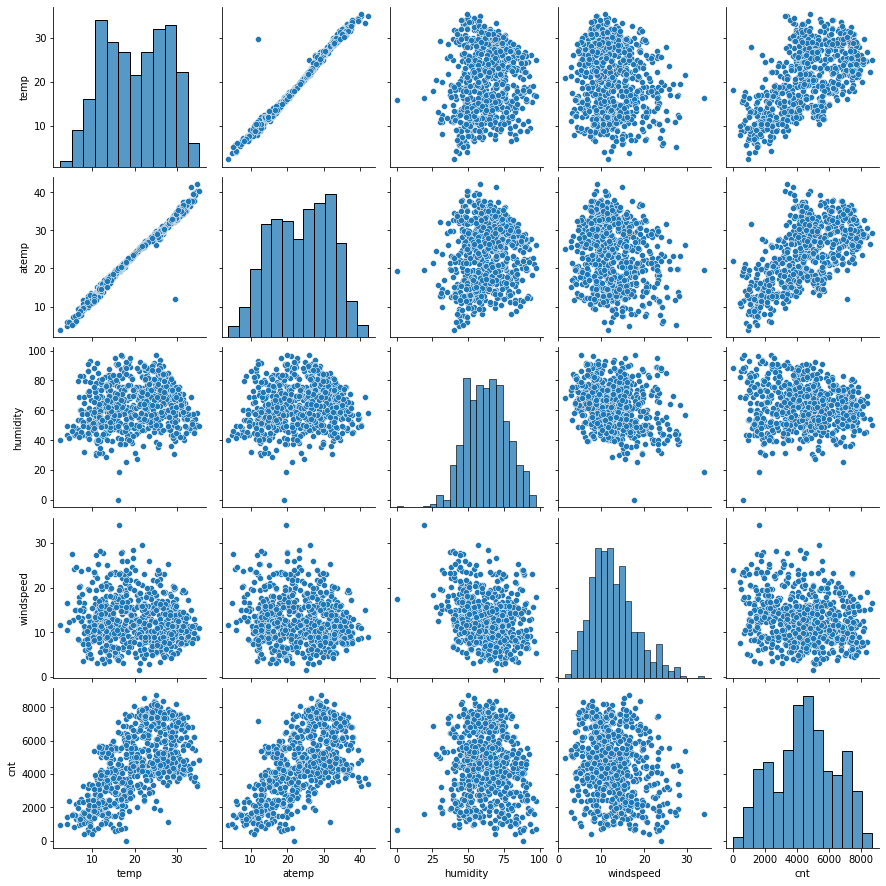

In [63]:
## Creating pairplot for specific continuous variables in the 'bike' dataset
sns.pairplot(bike, vars=['temp','atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

In [64]:
# Convert 'season' and 'weathersit' to categorical strings based on the metadata provided
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weather_mapping = {1: 'clear', 2: 'mist_cloudy', 3: 'light_snow_rain', 4: 'heavy_rain_ice'}

bike['season'] = bike['season'].map(season_mapping)
bike['weathersit'] = bike['weathersit'].map(weather_mapping)

bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,2018-01-01,spring,0,1,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,1,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


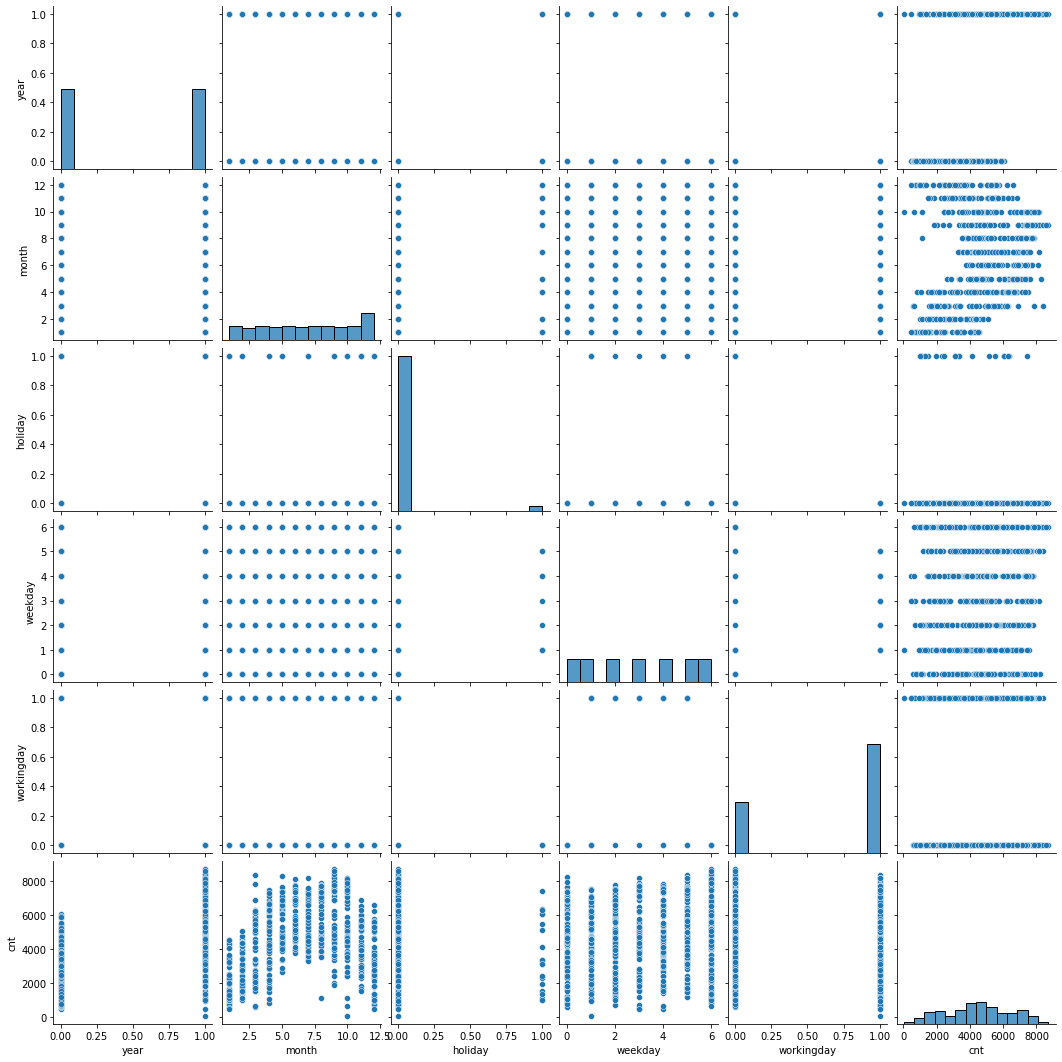

In [65]:
## Creating pairplot for specific categorical variables in the 'bike' dataset
sns.pairplot(bike, vars=['year','month','holiday','weekday','workingday', 'cnt'])
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

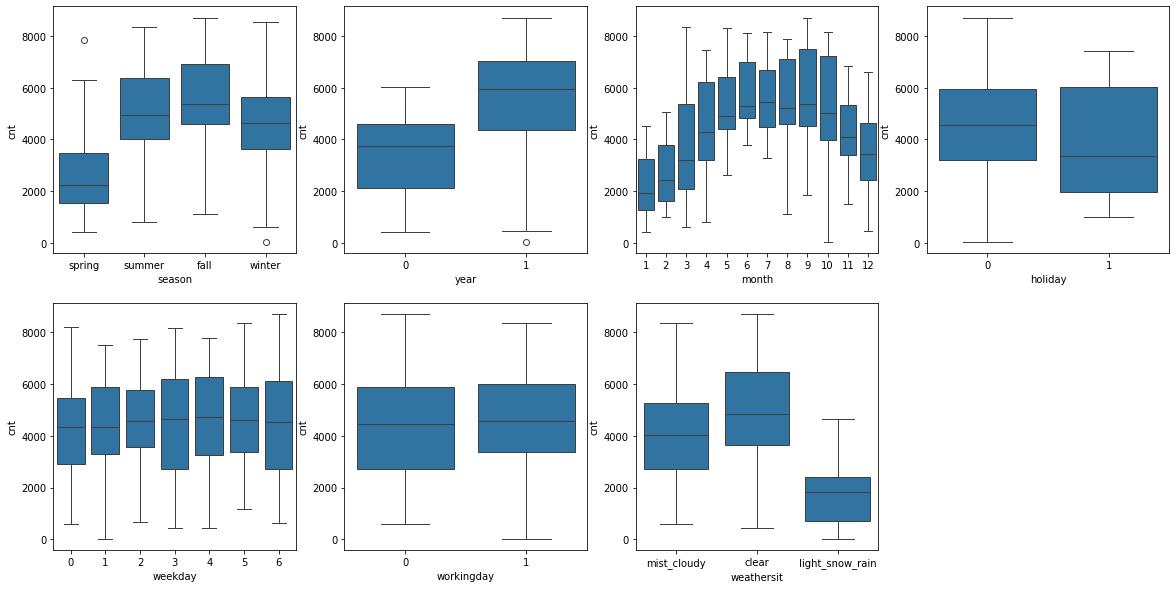

In [66]:
# Setting up a figure with specific dimensions
# figsize=(20,10) sets the width and height of the figure
# Creating a series of subplots to compare different categorical variables with 'cnt'

plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y ='cnt', data=bike)
plt.subplot(2, 4, 2)
sns.boxplot(x='year', y ='cnt', data=bike)
plt.subplot(2, 4, 3)
sns.boxplot(x='month', y ='cnt', data=bike)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y ='cnt', data=bike)
plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y ='cnt', data=bike)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y ='cnt', data=bike)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y ='cnt', data=bike)


### Encoding and preparing Data

In [67]:
# Applying one-hot encoding to 'season' and 'weathersit' columns in the 'bike' DataFrame.
# This creates new binary columns for each category in these two columns.
# 'drop_first=True' is used to avoid multicollinearity by dropping the

bike = pd.get_dummies(bike, columns=['season', 'weathersit'], drop_first=True)

columns_to_convert = ['season_spring', 'season_summer', 'season_winter', 
                      'weathersit_light_snow_rain', 'weathersit_mist_cloudy']

bike[columns_to_convert] = bike[columns_to_convert].apply(lambda x: x.astype(int))

bike.head()

,instant,dteday,year,month,holiday,weekday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_mist_cloudy
0,1,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,3,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,4,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,5,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [68]:
# Mapping for 'weekday' field
weekday_mapping = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}

# Apply the mapping to the 'weekday' column
bike['weekday'] = bike['weekday'].map(weekday_mapping)

# Generate dummy variables for the 'weekday' column
bike = pd.get_dummies(bike, columns=['weekday'], drop_first=True)

columns_to_convert = ['weekday_Mon', 'weekday_Sat', 'weekday_Sun', 
                      'weekday_Tues', 'weekday_Wed', 'weekday_Thurs']

bike[columns_to_convert] = bike[columns_to_convert].apply(lambda x: x.astype(int))

# Verify the changes
bike.head()


,instant,dteday,year,month,holiday,workingday,temp,atemp,humidity,windspeed,...,season_summer,season_winter,weathersit_light_snow_rain,weathersit_mist_cloudy,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,1,2018-01-01,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,1,0,0,0,0,0
1,2,2018-01-02,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,3,2018-01-03,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,4,2018-01-04,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-01-05,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [69]:
bike.head()

,instant,dteday,year,month,holiday,workingday,temp,atemp,humidity,windspeed,...,season_summer,season_winter,weathersit_light_snow_rain,weathersit_mist_cloudy,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,1,2018-01-01,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,1,0,0,0,0,0
1,2,2018-01-02,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,3,2018-01-03,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,4,2018-01-04,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-01-05,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Mapping for 'month' field
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Apply the mapping to the 'month' column
bike['month'] = bike['month'].map(month_mapping)

# Generate dummy variables for the 'month' column
bike = pd.get_dummies(bike, columns=['month'], drop_first=True)

columns_to_convert = ['month_Jan', 'month_Feb', 'month_Mar', 'month_May', 'month_Jun', 'month_Jul',
                      'month_Aug', 'month_Sep', 'month_Oct', 'month_Nov', 'month_Dec']

bike[columns_to_convert] = bike[columns_to_convert].apply(lambda x: x.astype(int))

# Verify the changes
bike.head()


,instant,dteday,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


### Splitting the data to train and test data frames

In [71]:
# Investigating the columns of the bike data frame
bike.columns


Index(['instant', 'dteday', 'year', 'holiday', 'workingday', 'temp', 'atemp',
       'humidity', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_light_snow_rain', 'weathersit_mist_cloudy',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'month_Aug', 'month_Dec', 'month_Feb',
       'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

In [72]:
# Dropping the dataday column
bike = bike.drop(columns=['dteday'])

# Splitting the train and test to two distinct sets
# Train will contain 70% of the data and test will contain 30% of the data.

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 31)
(220, 31)


### Scaling the data using Min Max Scaling

In [73]:
# Applying the MinMaxScaler to the selected numerical variables in the bike_train DataFrame
# This scales each variable in 'num_vars' to a range between 0 and 1

scaler = MinMaxScaler()
num_vars = ['temp', 'atemp','humidity', 'windspeed', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
576,577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,1,0,0,0,0,0,0
426,427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,1,0,0,0,0
728,729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,1,0,0,0,0,0,0,0,0,0
482,483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,0,0,0,0
111,112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,...,0,0,0,0,0,0,0,0,0,0


### Model development using RFE

In [74]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [75]:
# Splitting the train data to separate Independent and dependent variables

y_train = bike_train.pop('cnt')
X_train = bike_train

In [76]:
# Initializing a Linear Regression model and Fitting the Linear Regression model to the training data
# 'X_train' contains the feature variables, and 'y_train' is the target variable
# The fit method trains the model using the provided training data

lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [77]:
# RFE is a feature selection method that fits a model and removes the weakest features
# until the specified number of features is reached
# Here, 'lm' is the Linear Regression model, and 'n_features_to_select=10' specifies that
# the top 10 features should be selected

rfe = RFE(lm, n_features_to_select = 10) 
rfe = rfe.fit(X_train, y_train)

In [78]:
# Listing which features were selected from RFE model as top performing feature
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 21),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('weathersit_light_snow_rain', True, 1),
 ('weathersit_mist_cloudy', False, 4),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 19),
 ('weekday_Sun', False, 16),
 ('weekday_Thurs', False, 15),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', False, 14),
 ('month_Aug', False, 13),
 ('month_Dec', False, 9),
 ('month_Feb', False, 10),
 ('month_Jan', False, 7),
 ('month_Jul', False, 6),
 ('month_Jun', False, 18),
 ('month_Mar', False, 20),
 ('month_May', False, 11),
 ('month_Nov', False, 8),
 ('month_Oct', False, 17),
 ('month_Sep', False, 2)]

In [79]:
# Printing the list of high impactful features on target variable cnt
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_winter', 'weathersit_light_snow_rain', 'weekday_Mon',
       'weekday_Tues'],
      dtype='object')

In [80]:
# Printing the list of non-impactful features on target variable cnt

X_train.columns[~rfe.support_]


Index(['instant', 'atemp', 'season_spring', 'season_summer',
       'weathersit_mist_cloudy', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Wed', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep'],
      dtype='object')

In [81]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Reviewing the RFE model using Manual Statsmodel Approach

In [82]:
# Adding a constant variable  to list of columns identified by RFE as impactful columns

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [83]:
# Fitting an Ordinary Least Squares (OLS) regression model
# 'sm.OLS()' creates an OLS model which is a common method for linear regression analysis
# 'y_train' is the target variable and 'X_train_rfe' is the feature set selected by Recursive Feature Elimination (RFE)
# 'fit()' method trains the model on the training data
# This step is crucial for estimating the relationship between the independent variables (X_train_rfe)
# and the dependent variable (y_train), resulting in a model that can be used for predictions

lm = sm.OLS(y_train,X_train_rfe).fit() 

In [84]:
#Let's see the summary of our linear model
print(lm.summary())

# `holiday ` is insignificant in presence of other variables; can be dropped as the p-Value is much greater than .05
# Rest of the independent variables have p-Value lesser than .05
# R-square and Adjusted R-Square are around 80%. This is a measure of the model's goodness of fit, with higher values generally indicating a better fit
# F-statistics is of higher value often indicating a significant model.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     224.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.81e-169
Time:                        22:57:42   Log-Likelihood:                 451.67
No. Observations:                 510   AIC:                            -883.3
Df Residuals:                     500   BIC:                            -841.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [85]:
# `holiday ` is insignificant in presence of other variables; can be dropped as the p-Value is much greater than .05

X_train_new = X_train_rfe.drop(["holiday"], axis = 1)


In [86]:
# Rebuilding the model without `holiday`
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [87]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# `Weekday_Tuesday` is insignificant in presence of other variables; can be dropped as the p-Value is much greater than .05
# Rest of the independent variables have p-Value lesser than .05
# R-square and Adjusted R-Square are around 80%. This is a measure of the model's goodness of fit, with higher values generally indicating a better fit
# F-statistics is of higher value often indicating a significant model.


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     224.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.81e-169
Time:                        22:57:42   Log-Likelihood:                 451.67
No. Observations:                 510   AIC:                            -883.3
Df Residuals:                     500   BIC:                            -841.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [88]:
# `weekday_Tues` is insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["weekday_Tues","holiday"], axis = 1)

# Rebuilding the model without `weekday_Tues`
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# All of the independent variables have p-Value lesser than .05
# R-square and Adjusted R-Square are around 80%. This is a measure of the model's goodness of fit, with higher values generally indicating a better fit
# F-statistics is of higher value often indicating a significant model.



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     251.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.27e-170
Time:                        22:57:42   Log-Likelihood:                 450.07
No. Observations:                 510   AIC:                            -882.1
Df Residuals:                     501   BIC:                            -844.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Calculating VIF and MultiColinearity of the model

In [89]:
# Listing the independent variables in the model

X_train_new.columns

Index(['const', 'year', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_winter', 'weathersit_light_snow_rain', 'weekday_Mon'],
      dtype='object')

In [90]:
# Dropping the constant for VIF calculation

X_train_new = X_train_new.drop(['const'], axis=1)

In [91]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature in X and storing the results in a new column 'VIF'
# VIF is calculated for each feature 'i' in the DataFrame X
# The variance_inflation_factor function requires the entire set of features (X.values)
# and the index of the specific feature (i) for which VIF is being calculated

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# Based on VIF factor below, humidity has higher than normnal VIF factor and it highly co-related to other features
# humidity needs to be dropped from the linear model

,Features,VIF
3,humidity,11.45
2,temp,7.01
1,workingday,4.53
4,windspeed,3.60
0,year,2.02
7,weekday_Mon,1.78
5,season_winter,1.48
6,weathersit_light_snow_rain,1.08


In [92]:
# `humidity` is insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["weekday_Tues","holiday", "humidity"], axis = 1)

# Rebuilding the model without `humidity`
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# All of the independent variables have p-Value lesser than .05
# R-square and Adjusted R-Square are around 80%. This is a measure of the model's goodness of fit, with higher values generally indicating a better fit
# F-statistics is of higher value often indicating a significant model.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.46e-161
Time:                        22:57:43   Log-Likelihood:                 426.82
No. Observations:                 510   AIC:                            -837.6
Df Residuals:                     502   BIC:                            -803.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [93]:
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculating VIF for each feature in X and storing the results in a new column 'VIF'
# VIF is calculated for each feature 'i' in the DataFrame X after dropping humidity
# The variance_inflation_factor function requires the entire set of features (X.values)
# and the index of the specific feature (i) for which VIF is being calculated

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# A Variance Inflation Factor (VIF) below 5 for all variables in your regression model is generally considered a 
# good indication that multicollinearity is not a significant concern

,Features,VIF
2,temp,4.29
1,workingday,3.88
3,windspeed,3.28
0,year,2.02
6,weekday_Mon,1.66
4,season_winter,1.27
5,weathersit_light_snow_rain,1.06


## Residual Analysis of the train data


In [94]:
#Predicting the y based on the linear regresssion model and train data
y_train_cnt = lm.predict(X_train_lm)

In [95]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\rajes\AppData\Local\Temp\ipykernel_68216\1761515238.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

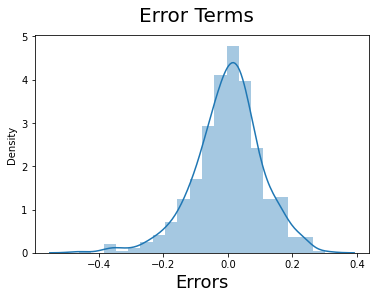

In [96]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# From the histogram below, the errors are normally distributed with minimal skewing

### Model Evaluation on Test Data

In [97]:
#Scaling the test data the same way as train data.
# MinMax scaling is used.

num_vars = ['temp', 'atemp','humidity', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

bike_test.head()

,instant,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
184,185,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,...,0,0,0,1,0,0,0,0,0,0
535,536,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,...,0,0,0,0,1,0,0,0,0,0
299,300,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,...,0,0,0,0,0,0,0,0,1,0
221,222,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,...,0,0,0,0,0,0,0,0,0,0
152,153,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,...,0,0,0,0,1,0,0,0,0,0


In [98]:
# Extracting the Independent and dependent variables in the test data

y_test = bike_test.pop('cnt')
X_test = bike_test

In [99]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

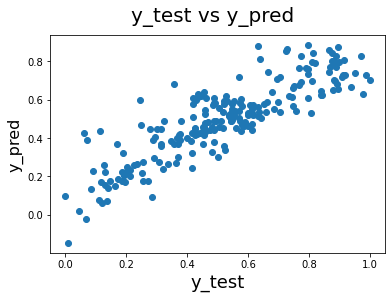

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# From the graph below, there is a linear relationship between actual and predicted values in the test data

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# R-Square value explains that nearly 73.95% of the variance in dependent variable (y_test) can be explained by the independent variables in our model

0.7395214111760765